# AR1 Observation report

## File to be processed

In [115]:
# just a random file
#filename = "/var/kat/archive/data/MeerKATAR1/telescope_products/2016/\
#/06/02/1464851236.h5"
filename="/var/kat/archive/data/MeerKATAR1/telescope_products/2016/06/10/1465564921.h5"


## Set up environment

In [116]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [117]:
import katdal
import scape
import pickle
import katpoint

## Load static flags

In [118]:
#pickle_file = open('/var/kat/katsdpscripts/RTS/rfi_mask.pickle')
pickle_file = open('/home/tony/Desktop/katsdpscripts/RTS/rfi_mask.pickle')
rfi_static_flags = pickle.load(pickle_file)
pickle_file.close()
edge = np.tile(True,4096)
edge[slice(211,3896)] = False
static_flags = np.logical_or(edge,rfi_static_flags)

## Load data

In [119]:
data = katdal.open(filename)

In [120]:
N = data.shape[0]
ext = 930
step = max(int(floor(N/ext)),1)
print step

1


In [121]:
print data

Name: /var/kat/archive/data/MeerKATAR1/telescope_products/2016/06/10/1465564921.h5 (version 3.0)
Observer: SSALIE VE1  Experiment ID: 20160610-0011
Description: 'SS PFB Sweep single_less_fine'
Observed from 2016-06-10 15:22:22.734 SAST to 2016-06-10 15:28:44.323 SAST
Dump rate / period: 0.50021 Hz / 1.999 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m001                                 2        4
Spectral Windows: 1
  ID  Product    CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0              1284.000         856.000          4096      208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m001']
  spw=0
-------------------------------------------------------------------------------
Shape: (191 dumps, 4096 channels, 4 correlation products) => Size: 25.035 MB
Antennas: *m001  Inputs: 2  Autocorr: yes  Crosscorr: no
Channels: 4096

In [122]:
data.obs_params

{'centre_freq': 1284.0,
 'config_label': '2c0b0f6,18d3109',
 'dbe_centre_freq': None,
 'description': 'SS PFB Sweep single_less_fine',
 'dry_run': False,
 'dump_rate': 1.0,
 'experiment_id': '20160610-0011',
 'force_siggen': False,
 'horizon': 15.0,
 'max_duration': None,
 'mode': None,
 'nd_params': {'diode': 'coupler', 'off': 0, 'on': 0, 'period': -1},
 'no_delays': False,
 'no_mask': False,
 'observer': 'SSALIE VE1',
 'product': None,
 'program_block_id': '',
 'projection': 'zenithal-equidistant',
 'proposal_id': '',
 'reduction_label': None,
 'sb_id_code': '20160610-0011',
 'script_arguments': '--siggen-ip=192.168.4.33 --siggen-port=10001 -o SS VE1 single less_fine --siggen-freq=1140.21875 --siggen-freq-minor=0,0.5,0.01 --siggen-power=-22.0 --track-duration=2.5 --sb-id-code=20160610-0011 --description=SS PFB Sweep single_less_fine --observer=SSALIE VE1 --config-label=2c0b0f6,18d3109',
 'script_name': '/home/kat/svn/katsdpscripts/AR1/UHF_scan.py',
 'siggen_freq': '1140.21875',
 'sig

## Plot timeseries, spectrograph and spectrum for each antenna

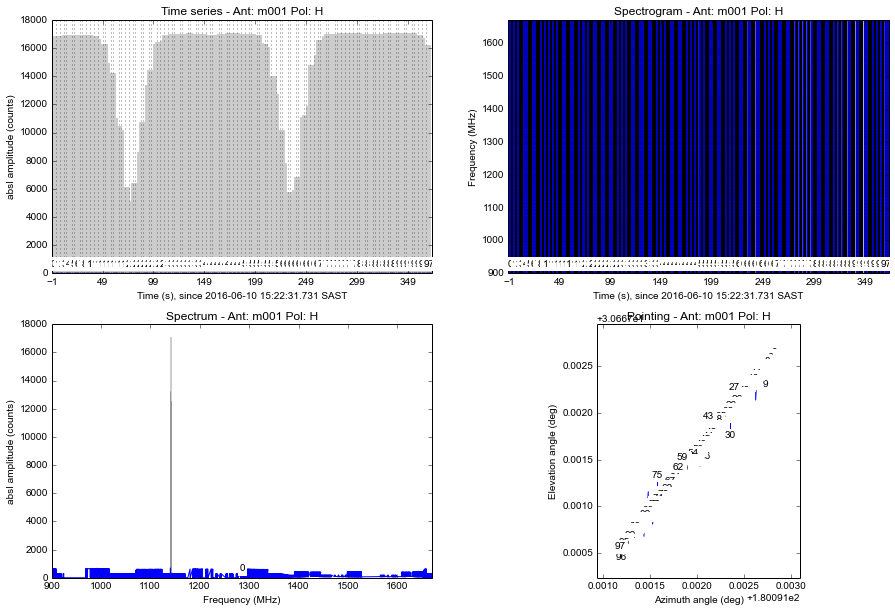

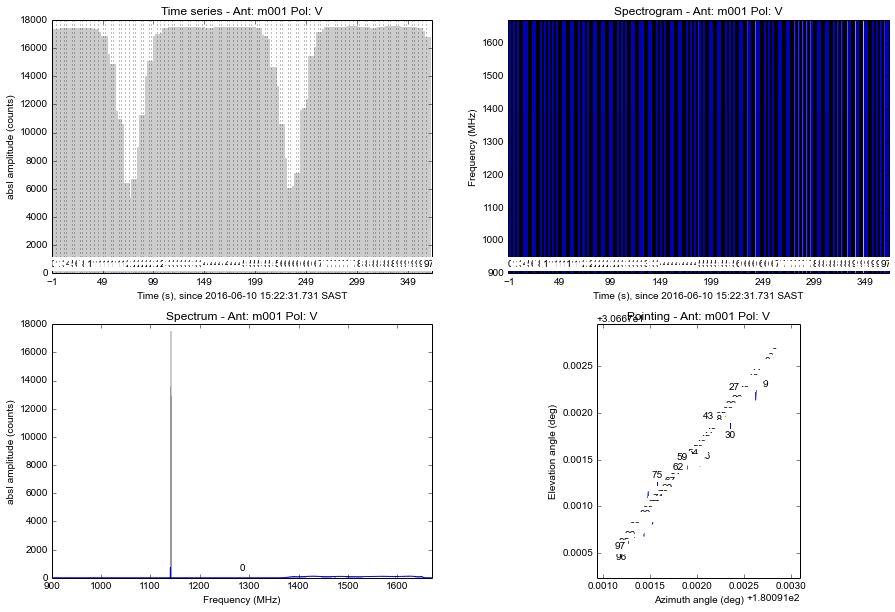

In [123]:
data.select()
ants = data.ants
for ant in ants:
    for active_pol in ['H','V']:
        ts_start = data.timestamps[0]
        ts_end = data.timestamps[-1]
        data.select(ants=ant.name,corrprods='auto',\
                    channels=~static_flags,pol=active_pol,dumps=slice(0,N,step),scans=['scan','track'])
        d = scape.DataSet(data)
        ts = data.timestamps - data.timestamps[0]
        figure(figsize=[15,10])
        subplot(221)
        scape.plot_xyz(d,'time','amp')
        title('Time series - Ant: %s Pol: %s'%(ant.name,active_pol))
        #yscale('log')
        #ylim(1,2000)
        subplot(222)
        scape.plot_xyz(d,'time','freq','amp')
        title('Spectrogram - Ant: %s Pol: %s'%(ant.name,active_pol))
        subplot(223)
        scape.plot_xyz(d,'freq','amp',label='Average')
        title('Spectrum - Ant: %s Pol: %s'%(ant.name,active_pol))
        #ylim(0,2000)
        subplot(224)
        scape.plot_xyz(d,'az','el')
        title('Pointing - Ant: %s Pol: %s'%(ant.name,active_pol))
    
    


In [127]:
data.timestamps[1] - data.timestamps[0]

1.9991543292999268

In [128]:
for ant in ants:
    print ant.description

m001, -30:43:17.3, 21:24:38.5, 1038.0, 13.5, 0.874 -171.798 0.709, -0:10:35.5 0 0:33:57.1 0:52:46.0 0:02:11.7 -0:01:00.6 -0:09:28.8 -0:08:49.3, 1.22


In [129]:
print scan_timestamps
print scan_freqinds
print scan_phase
print num_bls,data.shape[2]
print num_chans

[array([  8.99619412,  10.99534845]), array([ 12.99450254,  14.99365687]), array([ 16.9928112 ,  18.99196529]), array([ 20.99111962]), array([ 22.99027371,  24.98942804,  26.98858237]), array([ 28.98773646]), array([ 30.98689079,  32.98604512,  34.98519921]), array([ 36.98435354]), array([ 38.98350787,  40.98266196]), array([ 42.98181629,  44.98097038]), array([ 46.98012471,  48.97927904]), array([ 50.97843313,  52.97758746]), array([ 54.97674179,  56.97589588]), array([ 58.97505021]), array([ 60.97420454,  62.97335863,  64.97251296]), array([ 66.97166705]), array([ 68.97082138,  70.96997571,  72.9691298 ]), array([ 74.96828413]), array([ 76.96743846,  78.96659255]), array([ 80.96574688,  82.96490121]), array([ 84.9640553 ,  86.96320963]), array([ 88.96236396]), array([ 90.96151805,  92.96067238,  94.95982647]), array([ 96.9589808]), array([  98.95813513,  100.95728922,  102.95644355]), array([ 104.95559788]), array([ 106.95475197,  108.9539063 ,  110.95306063]), array([ 112.95221472])

ValueError: zero-size array to reduction operation minimum which has no identity

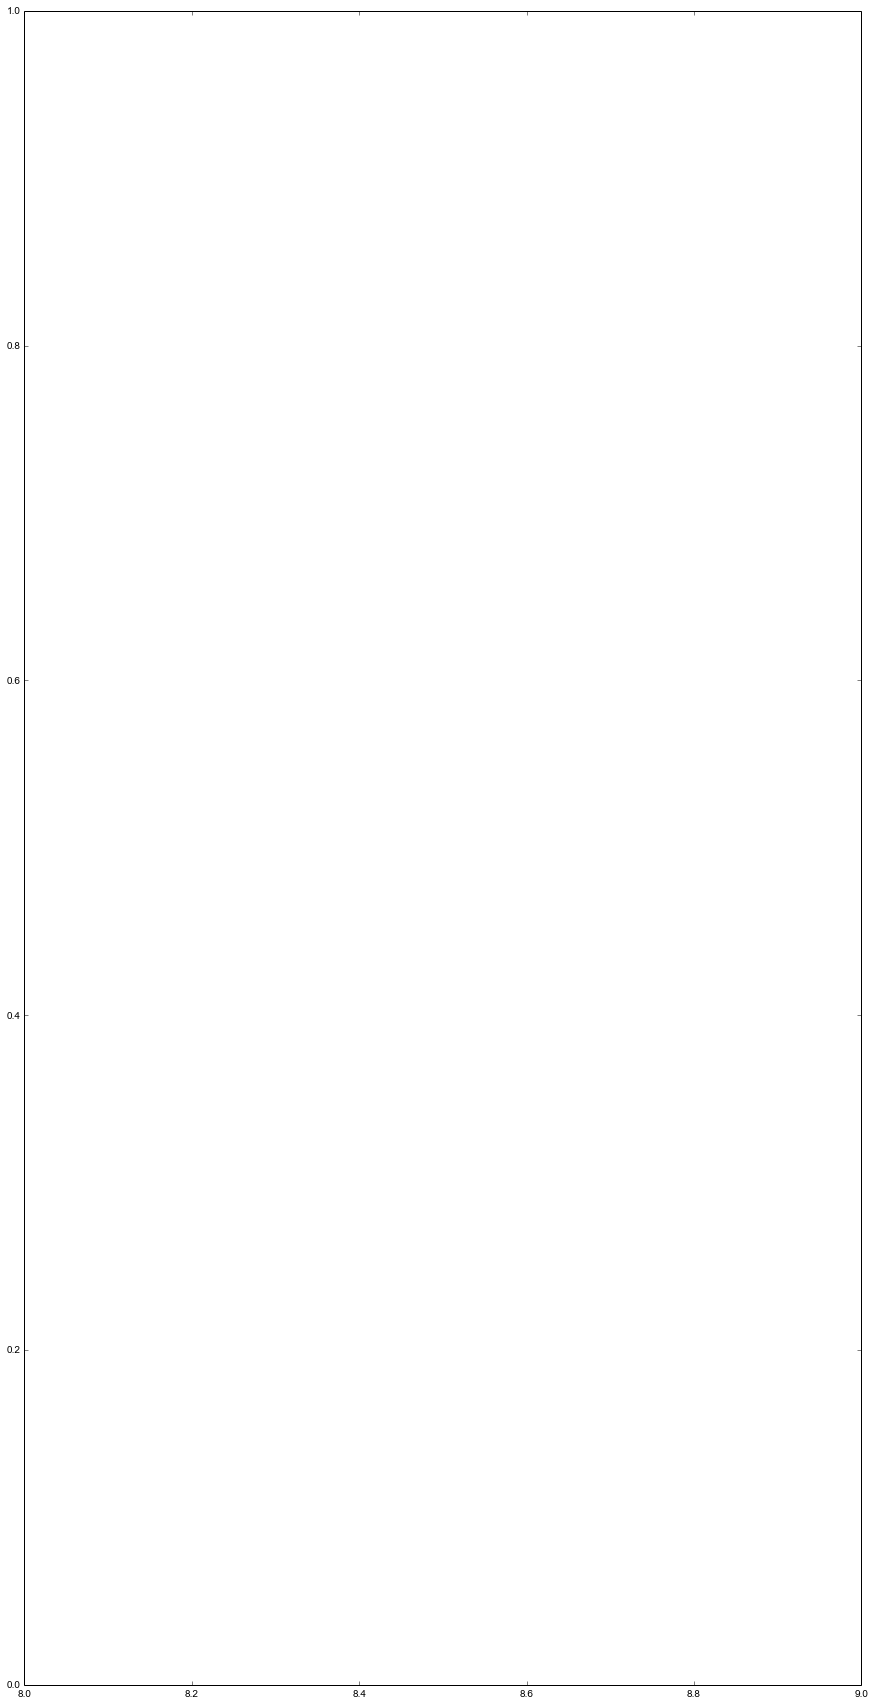

In [130]:
for active_pol in ['H','V']:
    data.select()
    data.select(corrprods='cross', channels=slice(2200,2800),pol=active_pol,scans=['scan','track'])
    baseline_names = [('%s - %s' % (inpA[:-1], inpB[:-1])) for inpA, inpB in data.corr_products]
    #num_bls = data.shape[2]
    num_bls=0
    num_chans, sample_period = len(data.channel_freqs), data.dump_period
    scan_targets, scan_mid_az, scan_mid_el, scan_timestamps, scan_phase = [], [], [], [], []
    for scan_ind, state, target in data.scans():
        num_ts = data.shape[0]
        ts = data.timestamps[0::step]
        vis = data.vis[0::step,:,:]
        scan_phase.append(np.angle(vis).T.reshape(-1, vis.shape[0]))
        scan_timestamps.append(ts - data.start_time.secs)
    scan_freqinds = [np.arange(num_bls * num_chans)] * len(scan_timestamps)

    figure(figsize=(15,30))
    segms, labels, lines = scape.plots_basic.plot_segments(scan_timestamps, scan_freqinds,\
                                scan_phase, labels=scan_targets)
    for label in labels:
        label.set_rotation('vertical')
    plt.xlabel('Time (s), since %s' % (katpoint.Timestamp(data.start_time).local(),))
    plt.yticks(np.arange(num_chans // 2, num_bls * num_chans, num_chans), baseline_names)
    for yval in range(0, num_bls * num_chans, num_chans):
        plt.axhline(yval, color='k', lw=2)
    plt.title('Raw visibility phase per baseline, Pol %s'%active_pol)

In [ ]:
print 'Report generated:'
!date